## Install Packages

In [1]:
install.packages("pheatmap")
install.packages("dplyr")

Installing package into ‘/home/q5gong/R/x86_64-conda-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/q5gong/R/x86_64-conda-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


## Load Packages

In [2]:
library("dplyr")
library("DESeq2")
library("circlize")
library("pheatmap")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘DESeq2’ was built under R version 4.1.2”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.2”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.1.1”

Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, ma

In [3]:
print(packageVersion("pheatmap"))

[1] ‘1.0.12’


## Load Data and Data Clening

In [4]:
data <- read.csv("data/GSE132329_Alonso-Curbelo_RNASeq_SET2.csv",
                 row.name="ID")
head(data)
names(data)

,Normal.shRen.713_RNA1,Normal.shRen.713_RNA2,Normal.shRen.713_RNA3,RegADM.shRen.713_RNA1,RegADM.shRen.713_RNA2,RegADM.shRen.713_RNA3,RegADM.shBrd4.1448_RNA1,RegADM.shBrd4.1448_RNA2,RegADM.shBrd4.1448_RNA3,Kras.ADR.shRen.713_RNA1,⋯,Kras.ADR.shBrd4.552_RNA1,Kras.ADR.shBrd4.552_RNA2,Kras.ADR.shBrd4.552_RNA3,Gene_name,chromosome_name,start_position,end_position,transcript_length,Strand,Karyotype_band
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
ENSMUSG00000000001,337,246,262,1359,1063,668,1213,1218,768,4943,⋯,6878,9627,7611,Gnai3,3,108107280,108146146,3262,-,F2.3
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,Pbsn,X,77837901,77853623,902,-,B
ENSMUSG00000000028,4,7,12,73,96,41,118,123,10,159,⋯,69,63,83,Cdc45,16,18780447,18811987,2143,-,A3
ENSMUSG00000000031,52,17,316,1294,579,213,3528,5748,2298,66,⋯,48,84,49,H19,7,142575529,142578143,2286,-,F5
ENSMUSG00000000037,1,0,0,2,7,6,2,10,3,7,⋯,2,1,4,Scml2,X,161117193,161258213,4847,+,F4
ENSMUSG00000000049,0,0,0,0,0,1,2,0,0,4,⋯,6,13,17,Apoh,11,108343354,108414396,1190,+,E1


[1] "Normal.shRen.713_RNA1"     "Normal.shRen.713_RNA2"    
 [3] "Normal.shRen.713_RNA3"     "RegADM.shRen.713_RNA1"    
 [5] "RegADM.shRen.713_RNA2"     "RegADM.shRen.713_RNA3"    
 [7] "RegADM.shBrd4.1448_RNA1"   "RegADM.shBrd4.1448_RNA2"  
 [9] "RegADM.shBrd4.1448_RNA3"   "Kras.ADR.shRen.713_RNA1"  
[11] "Kras.ADR.shRen.713_RNA2"   "Kras.ADR.shRen.713_RNA3"  
[13] "Kras.ADR.shBrd4.1448_RNA1" "Kras.ADR.shBrd4.1448_RNA2"
[15] "Kras.ADR.shBrd4.1448_RNA3" "Kras.ADR.shBrd4.552_RNA1" 
[17] "Kras.ADR.shBrd4.552_RNA2"  "Kras.ADR.shBrd4.552_RNA3" 
[19] "Gene_name"                 "chromosome_name"          
[21] "start_position"            "end_position"             
[23] "transcript_length"         "Strand"                   
[25] "Karyotype_band"

In [5]:
# create and output gene_id to gene_name dataframe (just in case if needed)
id2gene <- subset(data, select=c(Gene_name))
head(id2gene)

write.csv(as.data.frame(id2gene),
          file="data/gene_id_to_name.csv")

,Gene_name
,<chr>
ENSMUSG00000000001,Gnai3
ENSMUSG00000000003,Pbsn
ENSMUSG00000000028,Cdc45
ENSMUSG00000000031,H19
ENSMUSG00000000037,Scml2
ENSMUSG00000000049,Apoh


In [6]:
countdata <- subset(data, select=c(Normal.shRen.713_RNA1, 
                                   Normal.shRen.713_RNA2, 
                                   Normal.shRen.713_RNA3, 
                                   RegADM.shRen.713_RNA1, 
                                   RegADM.shRen.713_RNA2, 
                                   RegADM.shRen.713_RNA3,
                                   RegADM.shBrd4.1448_RNA1, 
                                   RegADM.shBrd4.1448_RNA2, 
                                   RegADM.shBrd4.1448_RNA3,
                                   Kras.ADR.shRen.713_RNA1, 
                                   Kras.ADR.shRen.713_RNA2, 
                                   Kras.ADR.shRen.713_RNA3, 
                                   Kras.ADR.shBrd4.1448_RNA1, 
                                   Kras.ADR.shBrd4.1448_RNA2, 
                                   Kras.ADR.shBrd4.1448_RNA3))
#                                    Kras.ADR.shBrd4.552_RNA1, 
#                                    Kras.ADR.shBrd4.552_RNA2, 
#                                    Kras.ADR.shBrd4.552_RNA3))
head(countdata)
names(countdata)

,Normal.shRen.713_RNA1,Normal.shRen.713_RNA2,Normal.shRen.713_RNA3,RegADM.shRen.713_RNA1,RegADM.shRen.713_RNA2,RegADM.shRen.713_RNA3,RegADM.shBrd4.1448_RNA1,RegADM.shBrd4.1448_RNA2,RegADM.shBrd4.1448_RNA3,Kras.ADR.shRen.713_RNA1,Kras.ADR.shRen.713_RNA2,Kras.ADR.shRen.713_RNA3,Kras.ADR.shBrd4.1448_RNA1,Kras.ADR.shBrd4.1448_RNA2,Kras.ADR.shBrd4.1448_RNA3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000000001,337,246,262,1359,1063,668,1213,1218,768,4943,7346,4979,5658,8404,7420
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,4,7,12,73,96,41,118,123,10,159,164,144,65,105,101
ENSMUSG00000000031,52,17,316,1294,579,213,3528,5748,2298,66,59,145,484,117,639
ENSMUSG00000000037,1,0,0,2,7,6,2,10,3,7,8,8,4,9,3
ENSMUSG00000000049,0,0,0,0,0,1,2,0,0,4,6,1,7,9,5


[1] "Normal.shRen.713_RNA1"     "Normal.shRen.713_RNA2"    
 [3] "Normal.shRen.713_RNA3"     "RegADM.shRen.713_RNA1"    
 [5] "RegADM.shRen.713_RNA2"     "RegADM.shRen.713_RNA3"    
 [7] "RegADM.shBrd4.1448_RNA1"   "RegADM.shBrd4.1448_RNA2"  
 [9] "RegADM.shBrd4.1448_RNA3"   "Kras.ADR.shRen.713_RNA1"  
[11] "Kras.ADR.shRen.713_RNA2"   "Kras.ADR.shRen.713_RNA3"  
[13] "Kras.ADR.shBrd4.1448_RNA1" "Kras.ADR.shBrd4.1448_RNA2"
[15] "Kras.ADR.shBrd4.1448_RNA3"

In [7]:
# re-naming due to avoid invalid naming 
names(countdata)[names(countdata) == 'Normal.shRen.713_RNA1'] <- "Normal_CshRen_713_RNA1"
names(countdata)[names(countdata) == 'Normal.shRen.713_RNA2'] <- "Normal_CshRen_713_RNA2" 
names(countdata)[names(countdata) == 'Normal.shRen.713_RNA3'] <- "Normal_CshRen_713_RNA3"
names(countdata)[names(countdata) == 'RegADM.shRen.713_RNA1'] <- "Injury_CshRen_713_RNA1"
names(countdata)[names(countdata) == 'RegADM.shRen.713_RNA2'] <- "Injury_CshRen_713_RNA2"
names(countdata)[names(countdata) == 'RegADM.shRen.713_RNA3'] <- "Injury_CshRen_713_RNA3"
names(countdata)[names(countdata) == 'RegADM.shBrd4.1448_RNA1'] <- "Injury_CshBrd4_1448_RNA1"
names(countdata)[names(countdata) == 'RegADM.shBrd4.1448_RNA2'] <- "Injury_CshBrd4_1448_RNA2"
names(countdata)[names(countdata) == 'RegADM.shBrd4.1448_RNA3'] <- "Injury_CshBrd4_1448_RNA3"
names(countdata)[names(countdata) == 'Kras.ADR.shRen.713_RNA1'] <- "KrasInjury_KCshRen_713_RNA1"
names(countdata)[names(countdata) == 'Kras.ADR.shRen.713_RNA2'] <- "KrasInjury_KCshRen_713_RNA2"
names(countdata)[names(countdata) == 'Kras.ADR.shRen.713_RNA3'] <- "KrasInjury_KCshRen_713_RNA3"
names(countdata)[names(countdata) == 'Kras.ADR.shBrd4.1448_RNA1'] <- "KrasInjury_KCshBrd4_1448_RNA1"
names(countdata)[names(countdata) == 'Kras.ADR.shBrd4.1448_RNA2'] <- "KrasInjury_KCshBrd4_1448_RNA2"
names(countdata)[names(countdata) == 'Kras.ADR.shBrd4.1448_RNA3'] <- "KrasInjury_KCshBrd4_1448_RNA3"
# names(countdata)[names(countdata) == "Kras.ADR.shBrd4.552_RNA1"] <- "KrasInjury_KCshBrd4_552_RNA1"
# names(countdata)[names(countdata) == "Kras.ADR.shBrd4.552_RNA2"] <- "KrasInjury_KCshBrd4_552_RNA2"
# names(countdata)[names(countdata) == "Kras.ADR.shBrd4.552_RNA3"] <- "KrasInjury_KCshBrd4_552_RNA3"

names(countdata)

[1] "Normal_CshRen_713_RNA1"        "Normal_CshRen_713_RNA2"       
 [3] "Normal_CshRen_713_RNA3"        "Injury_CshRen_713_RNA1"       
 [5] "Injury_CshRen_713_RNA2"        "Injury_CshRen_713_RNA3"       
 [7] "Injury_CshBrd4_1448_RNA1"      "Injury_CshBrd4_1448_RNA2"     
 [9] "Injury_CshBrd4_1448_RNA3"      "KrasInjury_KCshRen_713_RNA1"  
[11] "KrasInjury_KCshRen_713_RNA2"   "KrasInjury_KCshRen_713_RNA3"  
[13] "KrasInjury_KCshBrd4_1448_RNA1" "KrasInjury_KCshBrd4_1448_RNA2"
[15] "KrasInjury_KCshBrd4_1448_RNA3"

In [8]:
cts <- as.matrix(countdata)
conditions <- c(rep("Normal_CshRen", 3),
                rep("Injury_CshRen", 3),
                rep("Injury_CshBrd4", 3),
                rep("KrasInjury_CshRen", 3),
                rep("KrasInjury_CshBrd4", 3))
#                rep("KrasInjury_CshBrd4_552", 3))

samples <- data.frame("run"=c("Normal_CshRen_713_RNA1", 
                              "Normal_CshRen_713_RNA2", 
                              "Normal_CshRen_713_RNA3", 
                              "Injury_CshRen_713_RNA1", 
                              "Injury_CshRen_713_RNA2", 
                              "Injury_CshRen_713_RNA3",
                              "Injury_CshBrd4_1448_RNA1", 
                              "Injury_CshBrd4_1448_RNA2", 
                              "Injury_CshBrd4_1448_RNA3", 
                              "KrasInjury_KCshRen_713_RNA1", 
                              "KrasInjury_KCshRen_713_RNA2", 
                              "KrasInjury_KCshRen_713_RNA3",
                              "KrasInjury_KCshBrd4_1448_RNA1", 
                              "KrasInjury_KCshBrd4_1448_RNA2", 
                              "KrasInjury_KCshBrd4_1448_RNA3"),
#                               "KrasInjury_KCshBrd4_552_RNA1",
#                               "KrasInjury_KCshBrd4_552_RNA2",
#                               "KrasInjury_KCshBrd4_552_RNA3"),                      
                      "condition"=conditions)

## DESeq2

In [9]:
dds <- DESeqDataSetFromMatrix(countData = cts, 
                              colData = samples, 
                              design = ~condition)

# minimum filtering, remove count that is too low
# keep <- rowSums(counts(dds)) > 10
# dds <- dds[keep,]

dds <- DESeq(dds)
dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



class: DESeqDataSet 
dim: 53465 15 
metadata(1): version
assays(4): counts mu H cooks
rownames(53465): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000115849 ENSMUSG00000115850
rowData names(34): baseMean baseVar ... deviance maxCooks
colnames(15): Normal_CshRen_713_RNA1 Normal_CshRen_713_RNA2 ...
  KrasInjury_KCshBrd4_1448_RNA2 KrasInjury_KCshBrd4_1448_RNA3
colData names(3): run condition sizeFactor

In [10]:
results(dds)

log2 fold change (MLE): condition Normal CshRen vs Injury CshBrd4 
Wald test p-value: condition Normal CshRen vs Injury CshBrd4 
DataFrame with 53465 rows and 6 columns
                     baseMean log2FoldChange     lfcSE      stat      pvalue
                    <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000001 1713.04162      -0.537286  0.136285  -3.94236 8.06823e-05
ENSMUSG00000000003    0.00000             NA        NA        NA          NA
ENSMUSG00000000028   63.48636      -1.881720  0.592770  -3.17445 1.50120e-03
ENSMUSG00000000031 1381.89049      -3.517104  0.872193  -4.03248 5.51910e-05
ENSMUSG00000000037    4.15222      -2.398511  1.431110  -1.67598 9.37423e-02
...                       ...            ...       ...       ...         ...
ENSMUSG00000115846  0.0923942        1.36180   4.85661  0.280402    0.779169
ENSMUSG00000115847  0.0000000             NA        NA        NA          NA
ENSMUSG00000115848  0.8295112        2.32355   3.89454  0.596

## Select for DEGs

### From Methods
- Differentially expressed genes (DEGs) were determined by a greater-than twofold change in gene expression with adjusted P value < 0.05. 
>- greater than twofold change means abs(log2fold) > 1

### From Statistic and Reproducibility
- In RNA-seq data, significance for differential gene expression between groups was based on adjusted P value < 0.05. 

In [11]:
# Normal_CshRen v.s. Injury_CshRen
res1 <- results(dds, contrast=c("condition",
                                "Normal_CshRen",
                                "Injury_CshRen"))
# Normal_CshRen v.s. Kras*+Injury_CshRen
res2 <- results(dds, contrast=c("condition",
                                "Normal_CshRen",
                                "KrasInjury_CshRen"))
# Normal_CshRen v.s. Injury_CshBrd4
res3 <- results(dds, contrast=c("condition",
                                "Normal_CshRen",
                                "Injury_CshBrd4"))
# Normal_CshRen v.s. Kras*+Injury_CshBrd4
res4 <- results(dds, contrast=c("condition",
                                "Normal_CshRen",
                                "KrasInjury_CshBrd4"))

In [12]:
sigGenes <- unique(c(
  rownames(subset(res1, padj < 0.05 & abs(log2FoldChange) > 1)),
  rownames(subset(res2, padj < 0.05 & abs(log2FoldChange) > 1)),
  rownames(subset(res3, padj < 0.05 & abs(log2FoldChange) > 1)),
  rownames(subset(res4, padj < 0.05 & abs(log2FoldChange) > 1))
))

In [13]:
dds <- dds[sigGenes,]
dds

class: DESeqDataSet 
dim: 10634 15 
metadata(1): version
assays(4): counts mu H cooks
rownames(10634): ENSMUSG00000000028 ENSMUSG00000000215 ...
  ENSMUSG00000115736 ENSMUSG00000115813
rowData names(34): baseMean baseVar ... deviance maxCooks
colnames(15): Normal_CshRen_713_RNA1 Normal_CshRen_713_RNA2 ...
  KrasInjury_KCshBrd4_1448_RNA2 KrasInjury_KCshBrd4_1448_RNA3
colData names(3): run condition sizeFactor

## Select for Downregulated DEGs After Suppression of BRD4

### From Extended Data Table 4 
- The comparison is only made between `Injury_CshBrd4 v.s. Injury_CshRen` and `Kras*+Injury_CshBrd4 v.s. Kras*+Injury_CshRen`

### From Figure Caption
- the DEG displayed later in heatmap is "__downregulated DEGs__ after suppression of BRD4 in regenerative metaplasia (Csh: injury) or neoplastic transformation (KCsh: Kras* + injury) settings across the indicated conditions"

In [14]:
# Injury_CshBrd4 v.s. Injury_CshRen
res_Injury = results(dds, contrast=c("condition", 
                                     "Injury_CshBrd4",
                                     "Injury_CshRen"))

In [15]:
DownInjury <- as.data.frame(subset(res_Injury, padj < 0.05 & log2FoldChange < -1))

In [16]:
# Kras*+Injury_CshBrd4 v.s. Kras*+Injury_CshRen
res_KInjury = results(dds, contrast=c("condition",
                                      "KrasInjury_CshBrd4",
                                      "KrasInjury_CshRen"))

In [17]:
DownKInjury <- as.data.frame(subset(res_KInjury, padj < 0.05 & log2FoldChange < -1))

In [18]:
# select for significant genes, which based on information above, 
# should be genes with padj < 0.05 and log2foldchange < -1
sigDownDEGs <- unique(c(
  rownames(subset(res_Injury, padj < 0.05 & log2FoldChange < -1)),
  rownames(subset(res_KInjury, padj < 0.05 & log2FoldChange < -1))
))
length(sigDownDEGs)

[1] 1804

In [19]:
DownDEGs <- assay(dds)[sigDownDEGs,]

### Order the result

In [20]:
DownCommon <- intersect(rownames(DownInjury),
                        rownames(DownKInjury))
length(DownCommon)

DownRegenerative <- setdiff(rownames(DownInjury), DownCommon)
length(DownRegenerative)

DownNeoplasia <- setdiff(rownames(DownKInjury), DownCommon)
length(DownNeoplasia)

DownOrder <- c(DownRegenerative, DownCommon, DownNeoplasia)
length(DownOrder)

[1] 274

[1] 1064

[1] 466

[1] 1804

## Visualization using pheatmap
>- For heat map visualization of DEGs, samples were z-score normalized and plotted using the ‘pheatmap’ package in R.

In [21]:
OrderDownDEGs <- assay(rlog(dds, blind = FALSE))[DownOrder,]

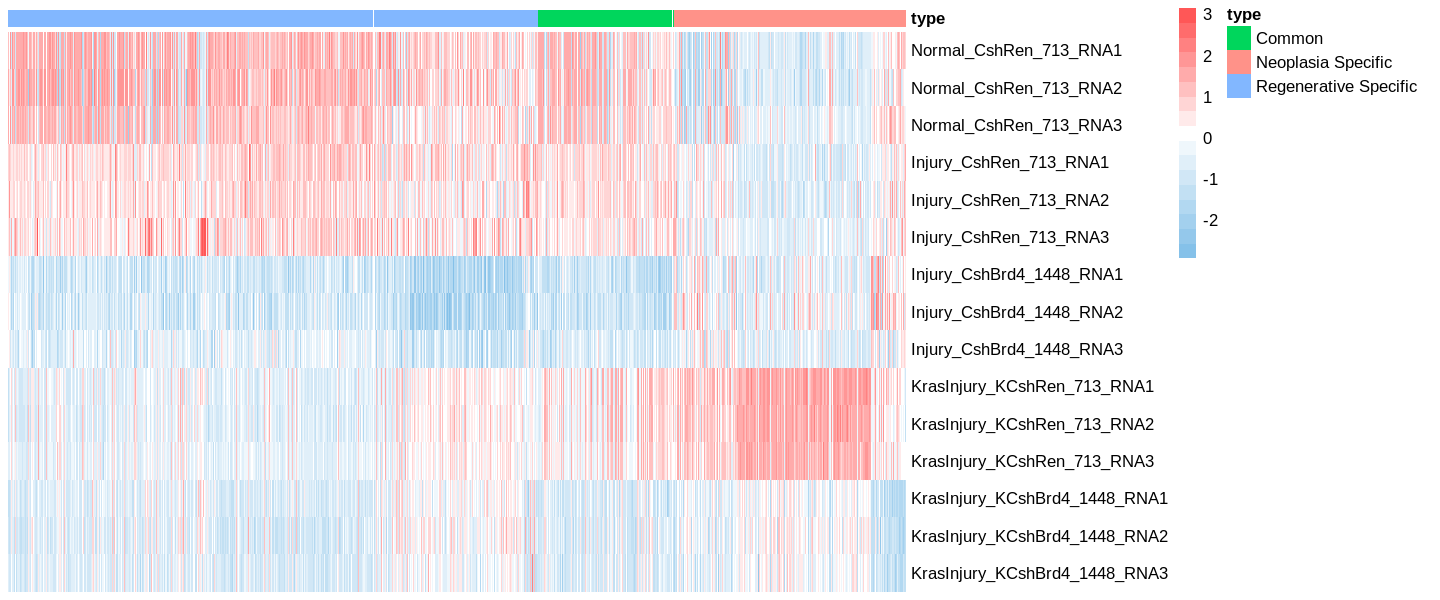

In [22]:
# Change Jupyter plot size
options(repr.plot.width=12, repr.plot.height=5)

normalizedOrderDownDEGs <- scale(t(OrderDownDEGs))
#sample CshBrd4_552 is not displayed
#normalizedDownDEGs <- normalizedDownDEGs[-c(16, 17, 18),]

annotation <- data.frame(gene_id = colnames(normalizedOrderDownDEGs),
                         type = "")
annotation[1:length(DownRegenerative), 2] <- "Regenerative Specific"
annotation[length(DownRegenerative) + 1:length(DownCommon), 2] <- "Common"
annotation[length(DownRegenerative) + length(DownCommon) + 1:length(DownNeoplasia), 2] <- "Neoplasia Specific"

row.names(annotation) <- annotation$gene_id
annotation <- subset(annotation, select=-c(gene_id))

annotation_col <- annotation

pheatmap(normalizedOrderDownDEGs, 
         color=colorRampPalette(c("#85C1E9", "white", "#FF5757"))(17),
         annotation_col=annotation_col,
         cluster_rows=FALSE,
         cluster_cols=FALSE,
         treeheight_col=0,
         show_colnames=FALSE)